In [1]:
# to do list
## section 5.1 describe layers better (2 hour)
## sort out ref's and make hyperlinks (1 hour)
## conclusion (1 hour)

## read me (2 hours)
## quickfix ref on assignment (1 hour)


***
***


# Time-Series Anomoly Detection with Autoencoders

<br>


***
***


<h1>1. Introduction</h1>

***

Keras is a deep learning API built on top of the Tensorflow machine learning platform. Tensorflow provides high level abstraction and gives the user the tools needed to develop machine learning solutions to solve complex problems. This project content will be based artificial neural networks called autoencoders and will explore Timeseries anomoly detection while leveraging the Keras documentation located on the [Keras website](https://keras.io/examples/timeseries/timeseries_anomaly_detection/). Lets take a look at what can be expected in this project:
- *Background Section* walking through Time Series Anomoly Detection, Neural Networks and Autoencoders.
- *Getting Started Section* where we have a look at the data used in documentation
- Neural Network Section..
- Evaluation Section..

# 2. Background

***

<h2><span style='color:#00008B'>2.1 Time Series Anomoly Detection</span></h2>

Time series data can be thought of as a collection of data points gathered over time intervals. Evaluating this data allows us to trend how something changes over time and potentially helps us understand the underlying causes of the trends. 
<br>

An anomoly in a dataset can be thought of as an outlier where a datapoint differs significantly from the rest. For obvious reasons there is great benifit to identifying outliers in one's data to help identify potential risks. Bhattacharya (2020) helps describe the importance of detecting anomalies by detailing how companies constantly need to evaluate the "new normal" in the data to ultimately drive business decisions. He then details how one can appraoch this problem via Un-supervised nerual networks. Before exploring the keras variation of this (Autoencoders) lets take a step back and talk about Neural Networks.

<h2><span style='color:#00008B'>2.2 Neural Networks  </span></h2>

Neural Networks are comprised of inter-connected layers of artificial neurons called nodes that perform operations on input to potentially yield an optimised output for a given problem **[Koech, 2022]**. As detailed by  Kostadinov (2019) a model typically trains itself through a process known as the "Chain Rule", where every feed forward through a network undergoes a back-propagation step where the weights and biases are adjusted based on the gradient of the cost function (we will explore cost functions in more detail later). Let's have a look at single neuron to help understand how they work (See Figure 1 below).

In the single neruron below we can see the inputs labelled as x<sub>1</sub> and x<sub>2</sub> have weights (w<sub>k1</sub>, w<sub>k2</sub>) and a Bias (b<sub>k</sub>) applied to them before being passed through an activation function (φ) to yield the output (y<sub>k</sub>). We can summarise the actions of the single neuron below with an equation that describe how the output is the activated weighted sum of the inputs.

***Equation 1***: A Neuron with 2 inputs: <br>
<span style="font-size:larger;">y<sub>k</sub> = φ( (w<sub>k1</sub> x<sub>1</sub>    + w<sub>k2</sub> x<sub>2</sub>) + b<sub>k</sub>) </span>

<img src="images/neural_network_image.png" width="800">
Figure 1. [Saxena, 2020]  

Lets explore the actions of a neuron in more detail before moving on to Autoencoders. The weights in a network determine dictate how important a given feature is in a model, for example a weights close to zero indicates that this input is not an important feature in the model. Weights help correlate relationships between features in the data dataset to target values. The idea here is that weights can moderate the association between features to prevent positive association on the summation process if the relationship is not positive, for example if we just sum the input data and the bias without multiplying them by the optimal weights we would result in a scenario where feature relationships are purely associative or dis-associative **[Ganesh (2020)]**. 

As per Ganesh (2020) lets explore a scenario where we have two input features and we want to perform binary classification. Figure 2 below shows two classes of data and the activation function using a neural network with weights (red) and without weights (black). The use of weights allows you to alter the slope of the line to better fit your model, whearas without weights the activation function of x<sub>2</sub> = -x<sub>1</sub>  + b has a constant slope of -1. Note that altering the bias just moves the activation function to the left or right and many different types of activation functions exist.

In [2]:
# Numerical arrays.
import numpy as np

# Spreadsheet-like Data Frames.
import pandas as pd

# Neural networks.
import tensorflow.keras as keras

# Plotting.
import matplotlib.pyplot as plt
import matplotlib.dates as dt

# Fancier plotting.
import seaborn as sns

# format plots.
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set_style('darkgrid')

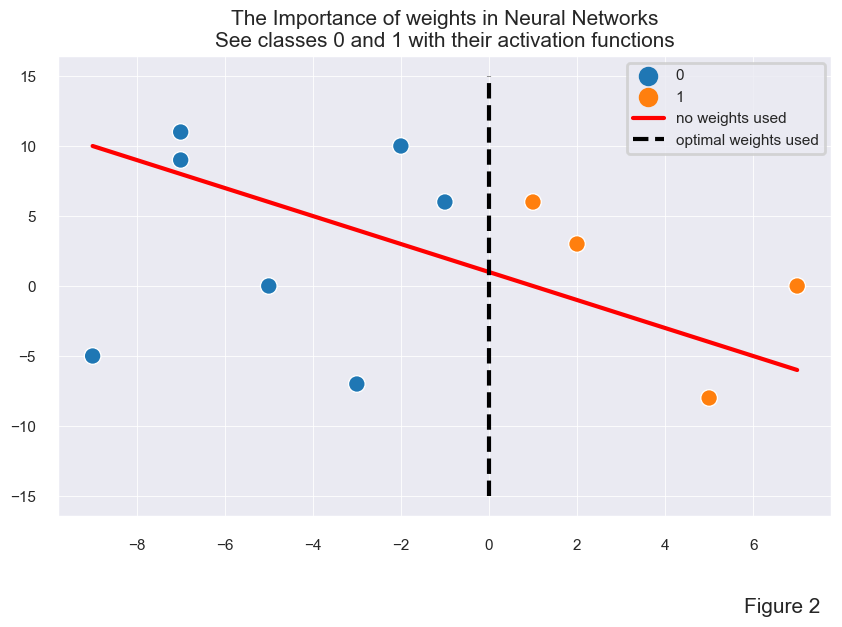

In [3]:
# two input arrays.
x1 = np.array([-9,  1, -5, -3,  5, -7, 2, -2, 7, -7, -1])
x2 = np.array([-5,  6,  0, -7, -8, 11, 3, 10, 0, 9, 6])

# class array (distinguish between features).
xclass = [0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]

# set constant bias for plot
bias = 1

# dataframe for plotting.
df = pd.DataFrame({'x1':x1, 'x2':x2, 'class':xclass})

# create figure and single axes.
fig, ax = plt.subplots(figsize = (10, 6))

# plot input data
sns.scatterplot(data=df, x=x1, y=x2, hue='class')

# plot x1 and predicted y value using eqn: (x2 = -x1 + bias) -> no weights applied
sns.lineplot(data=df, x=x1, y =(-x1 + bias), color='red', label='no weights used')

# plot class boundary (activation function) a neural,
# network could achieve with optimal weights.
plt.plot([0, 0], [-15, 15], '--k', label = 'optimal weights used');

# format and label plot.
plt.figtext(0.85, -0.05, 'Figure 2', horizontalalignment='center', fontsize=15)
ax.set_title('The Importance of weights in Neural Networks\n\
See classes 0 and 1 with their activation functions', fontsize=15)
plt.legend();

<h2><span style='color:#00008B'>2.3 Rectified Linear Unit (ReLU)</span></h2>

ReLU is a type of activation function used in Neural Networks. An activation functions role is to map the summed weighted input to an output that dictates how a neuron should behave [Sharma 2017]. Popular non-linear activation functions such as the sigmoid and Tanh functions work by transforming the input to values between 0 to 1 and -1 to 1 respectively, which means that large changes in the input data can result in small changes in the output. Lets compare the sigmoid and ReLU activation function to help understand the differences.

ReLU is a linear activation function used that works by mapping negative values to zero. ReLU activation can have an advantage over sigmoid activation due to the shape of it's first-order derivative. Lets have a look at Figure 9 below to help explore this. Notice how the derivatives of the functions differ. We can see that the sigmoid derivative peaks at 0.25 and drops into two tails, whearas the ReLU derivative shows either a value of 0 or 1. Why can this be a problem for simoidal activation? First lets take a step back and understand how activation functions on the neuron level effect a model's ability to learn.

Jacob (2022) explains how we can represent the gradient of the loss function as the product of gradients of all the activation functions of all nodes with respect to their weights [Jacob (2022)]. In order words, the updated weights depend on the gradients of the individual activation functions that are used during the backpropagation process in calculations that obey the chain rule. This means that if your activation function have the potential to degrade overtime it will in-turn diminish your models ability to alter its weights and learn. A Neural networks learning is guided by an optimiser, lets explore the optimiser that will be used in our network (after Activation plots).

In [4]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_der(x):
    return 1/(1 + np.exp(-x)) * (1 - 1/(1 + np.exp(-x)))

def relu(x):
    return np.array([max(0,value) for value in x])

def relu_der(x):
    return np.array([1 if value>0 else 0 for value in x])

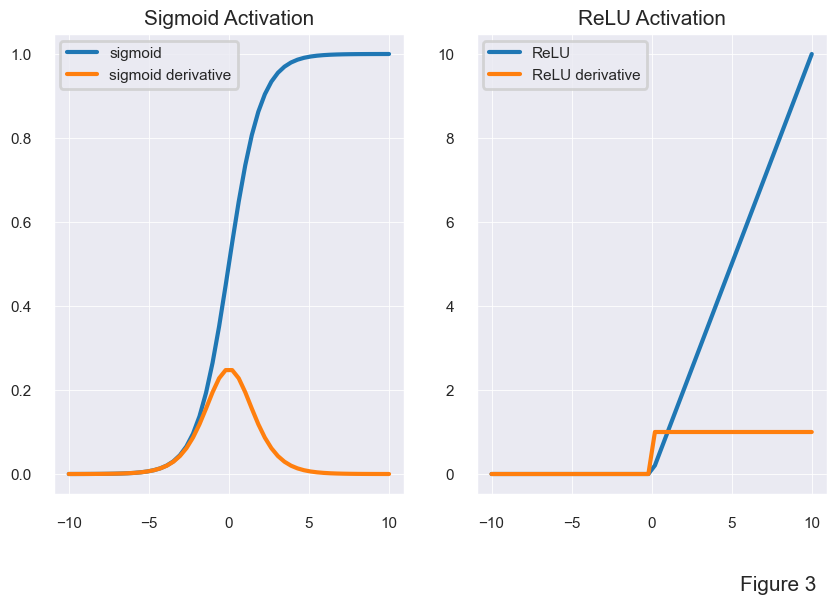

In [5]:
# create figure and 2 axis.
fig, (ax1, ax2) = plt.subplots(1, 2 ,figsize=(10 ,6))
plt.figtext(0.85, -0.05, 'Figure 3', horizontalalignment='center', fontsize=15)

# declare plot data.
x = np.linspace(-10, 10, 50)    

# plot data.
ax1.plot(x, sigmoid(x), label = 'sigmoid') 
ax2.plot(x, relu(x), label = 'ReLU') 
ax1.plot(x, sigmoid_der(x), label = 'sigmoid derivative') 
ax2.plot(x, relu_der(x), label = 'ReLU derivative') 

# label and format plots.
ax1.set_title("Sigmoid Activation",fontsize=15) 
ax2.set_title("ReLU Activation", fontsize=15) 
ax1.legend()
ax2.legend()
plt.show();

<h2><span style='color:#00008B'>2.4 Adaptive Moment Estimation (Adam)</span></h2>

Adam is a very popular optimization algorithm used in machine learning. Optimisers guide the learning process of a model by mimimizing the error of the loss function (mean squaread error in our case). The loss function is used by the optimiser as a metric for how close our input data is to our output data. The optimiser tweaks our models weights until the cost function reaches its lowest value (hopefully).

To help understand how Adam works first lets explore Gradient Descent which is a key component of Adam. Musstafa (2021) helps describe how Gradient Descent iteratively reduces a loss function by moving in the opposite direction to the steepest ascent. He then goes on to detail how the descent leverages the first-order derivatives of the loss functions to know which direction will ascend the slope. If we look at Figure 4 below it is easier to visualise this.

In Figure 4 we can see the learning steps improving with each step (red dots). The size of each step is determined by multiplying the step size hyperparameter by the gradient at that step. One can run into problems by not setting the correct step size which could result in a scenario where the global minima is not reached. Brownlee (2021) helps detail how Adam optimises the step size throughout the learning process by tracking the history of the gradient. This will aid our model in traversing a terrain with noise, for example in figure 4 below we have a local minima where a data point is stuck. Gradient Descent and some of its close cousins could find themselves in a situation where their next learning step can not overcome the hump, whearas Adam would have a greater chance of overcoming the noise as it has a good perspective on the gradient's history.

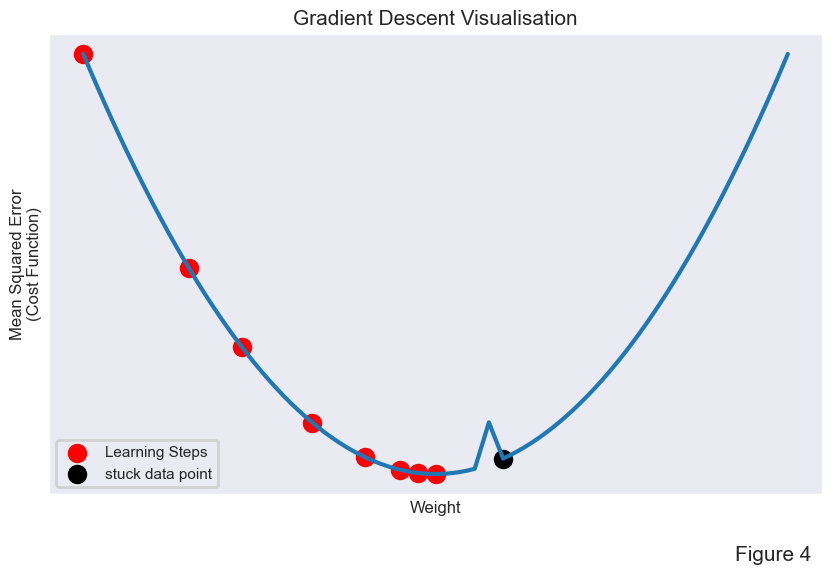

In [6]:
# create figure and single axes.
fig, ax = plt.subplots(figsize = (10,6))
plt.figtext(0.85, 0, 'Figure 4', horizontalalignment='center', fontsize = 15);

# Plot x vs x squared
x = np.linspace(-1, 1, 100)
y = x * x

# alterting y values to incorperate local minima into plot***
# get index of datapoint passed half-way point 
idx = int((len(x) // 1.75))

# alter y-values at and around index
y[idx-1] = y[idx-1] +0.05
y[idx] = y[idx] + 0.1
y[idx+1] = y[idx+1] + 0.05

# plot function
ax.plot(x, y)

# plot learning steps
weights = [-1, -0.70, -0.55, -0.35, -0.20, -0.10, -0.05, 0.00]
costs = [weight ** 2 for weight in weights]
ax.scatter(weights, costs, color='red',  label = 'Learning Steps')

# plot datapoint stuck at local minima
ax.scatter(x[idx+2], y[idx+2], color='black', label = 'stuck data point')

# label plot.
ax.set_xlabel('Weight')
ax.set_ylabel('Mean Squared Error\n(Cost Function)')
ax.set_title("Gradient Descent Visualisation", fontsize=15)

# Hide axis ticks
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])
plt.legend()
plt.show();

<h2><span style='color:#00008B'>2.5 Autoencoders</span></h2>

An Autoencoder is a type of artifical neural network used to learn data encodings in an unsupervised manner, where the aim is to learn a lower-dimensational representation for higher dimenstional data **[Bandyopadhyay, 2022]**. This statement contains a lot of information, lets parse out the detail.

The ability of an Autoencoder to leverage the un-supervised learning approach allow us to draw insight from unlabelled data which is of great benifit as it can be very costly to label large datasets. The ANN's ability to transform data from higher to lower-dimensional space is very important as it can be very difficuly to interpret higher dimensional data. Think of a model trying to learn with a large number of input variables across 3 dimensions where the the important data needed to effectively train the model only occupies localised regions of the space. With such a scenario it could be computationally heavy to extract the relevant information from the space and could potentially lead to overfitting as more features are fed into the model, i.e: the model finds the best solution that may not be representative of the real world problem. Lets walk through figure 5 below to get a better understanding of how Autoencoders work.

As shown below they are comprised of an Input Layer, hidden layers (with a bottle neck) and an output layer. We can see that the encoding process occurs in the hidden layers before the bottelneck. The task of the encoder is compress the data to a lower dimension. This is achieved at the bottleneck as it forces information loss, this imperfect data is then passed through the decoder for de-compression and a reconstruction error is calculated (i.e difference between pre and post compression values). 

This reconstruction error can be leveraged when trying to detect anomalous data. Imagine an autoencoder model which was trained to the highest possible degree in the lower dimensional space. An outliar data point relative to the model would have a high reconstruction error and therefore be labelled as an anomoly. Ok lets leverage the Keras documentation to build an autoencoder for timeseries anomaly detection.

<img src="images/autoencoder.png" width="700">
Figure 5. [Bandyopadhyay, 2022]


<br>
<br>

# 3. Getting Started
***

<h2><span style='color:#00008B'>3.1 Loading the Datasets</span></h2>

As per the [Keras documentation](https://keras.io/examples/timeseries/timeseries_anomaly_detection/) we will use two datasets from the Numenta Anomaly Benchmark (NAB). NAB is a benchmark for testing algorithms for anomoly detection in streaming online applications. Details on the NAB Datasets and how different algorithms performed on the datasets can be accessed at the  [NAB documentation](https://github.com/numenta/NAB) on github. The scoreboards located here compare the algorithms performances based on standard profile vs. false positives and negative scores obtained. For this project we will be exploring two datasets:
1. Artifical with no anomoly ([art_daily_small_noise.csv](https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_small_noise.csv))
2. Artifical with anomoly ([art_daily_jumpsup.csv](https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/art_daily_jumpsup.csv))


In [7]:
# Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

In [8]:
# read no anomaly file and with timestanp column as index.
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp", float_precision=None)

# look at last 5 rows of dataset.
df_small_noise.tail()

,value
timestamp,
2014-04-14 23:35:00,20.211195
2014-04-14 23:40:00,20.531041
2014-04-14 23:45:00,19.032127
2014-04-14 23:50:00,21.798801
2014-04-14 23:55:00,18.682620


In [9]:
# Check un-formatted value of last row in small noise dataset,
df_small_noise.iloc[-1].values[0]

18.6826203655

In [10]:
# check datatype present in dataframe.
# Notice pandas is performing some rounding when converting to float64.
df_small_noise.dtypes

value    float64
dtype: object

In [11]:
# Confirm shape of dataset.
df_small_noise.shape

(4032, 1)

In [12]:
# Generate descriptive stats on dataset.
df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


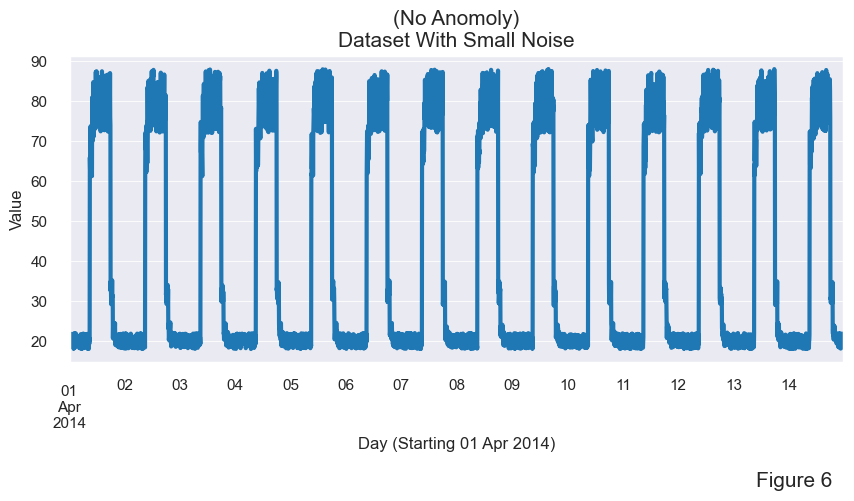

In [13]:
# create figure and single axes.
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_small_noise.plot(legend=False, ax=ax)

# format and label plot.
ax.set_xlabel('Day (Starting 01 Apr 2014)')
ax.set_ylabel('Value')
ax.set_title("(No Anomoly)\nDataset With Small Noise", fontsize=15)
plt.figtext(0.85, -0.2, 'Figure 6', horizontalalignment='center', fontsize=15);

In [14]:
# read anomaly file and with timestanp column as index.
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

# look at first 5 rows.
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


In [15]:
# Confirm shape of dataset.
df_daily_jumpsup.shape

(4032, 1)

In [16]:
# Generate descriptive stats on dataset.
df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


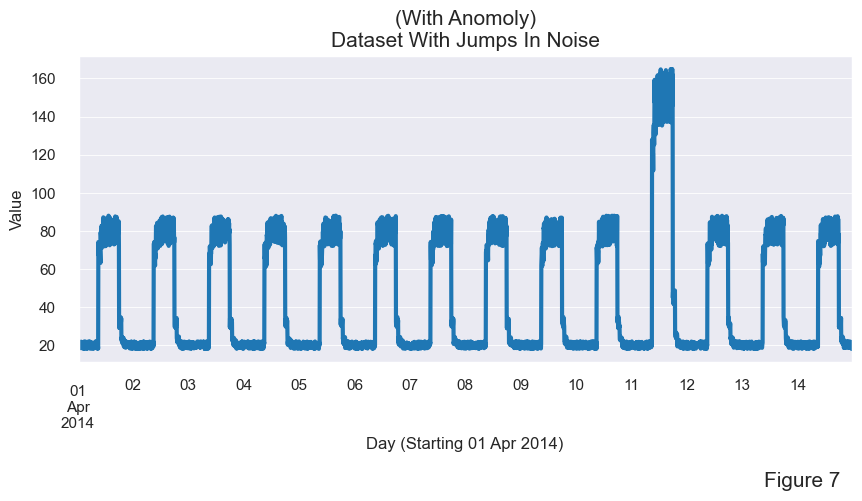

In [17]:
# create figure and single axes.
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_daily_jumpsup.plot(legend=False, ax=ax)

# label plot.
ax.set_xlabel('Day (Starting 01 Apr 2014)')
ax.set_ylabel('Value')
ax.set_title("(With Anomoly)\nDataset With Jumps In Noise", fontsize=15)
plt.figtext(0.85, -0.2, 'Figure 7', horizontalalignment='center', fontsize=15);

As shown by the Pandas *describe* method the mean, maximum, std deviation and quartiles values are all higher for the dataset with anomolies. The *shape* method also confirms that both datasets are 1-dimensional with 4032 rows.


<br>

# 4. Pre-processing

***

Before we build the Neural Network we will need to carry out a few Pre-processing tasks. Data Pre-processing is a very important step before the modelling of a dataset as it prepares the raw data for modelling. We will perform the following operations on our data:
- **Standardization** of the data to ensure it is scaled properly. This is an important pre-processing step for machine learning models as all features are alligned to a common scale which contributes to more efficient learning. The expected outcome of this process is that the data will have a mean of nearly zero and a standard deviation of 1. 
- **Transformation** of the data to create a fully windowed datset. Windowing a dataset involves partitioning it into sub-sections and increasing the number of dimensions (UM, 2020). The transformed dataset can then be leveraged via a convolutional neural network in the Keras library (more on this later).

 <h2><span style='color:#00008B'>4.1 Standardization</span></h2>
 
 <br>


In [18]:
# calculate mean of dataset with small noise.
train_mean = df_small_noise.mean()
train_mean

value    42.438353
dtype: float64

In [19]:
# calculate standard deviation of dataset with small noise.
train_std = df_small_noise.std()
train_std

value    28.077122
dtype: float64

In [20]:
# Standardization of data to transform it to standard format.
df_train_vals = (df_small_noise - train_mean) / train_std

# check first 5 rows.
df_train_vals.head()

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


In [21]:
# confirm mean is nearly 0.
df_train_vals['value'].mean()

-2.616541242931684e-15

In [22]:
# confirm std dev is nearly 1.
df_train_vals['value'].std()

1.0000000000000018

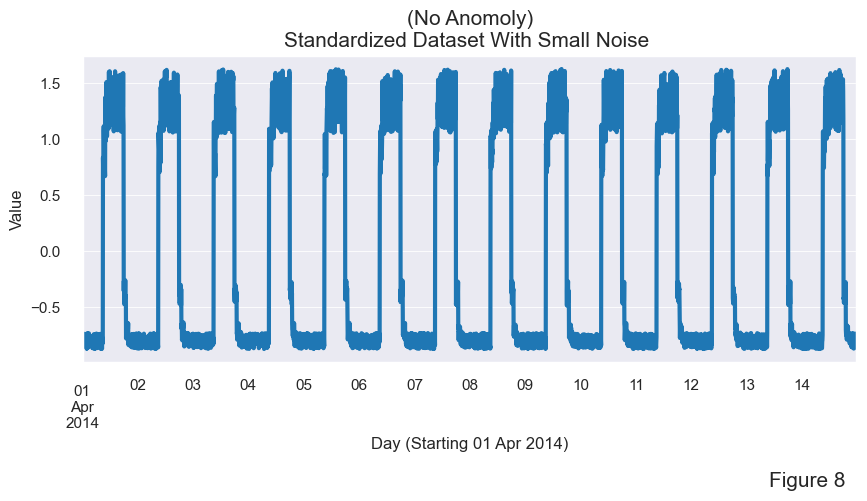

In [23]:
# create figure and single axes.
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax)

# format and label plot.
ax.set_xlabel('Day (Starting 01 Apr 2014)')
ax.set_ylabel('Value')
ax.set_title("(No Anomoly)\nStandardized Dataset With Small Noise ", fontsize=15)
plt.figtext(0.85, -0.2, 'Figure 8', horizontalalignment='center', fontsize=15);

<h2><span style='color:#00008B'>4.2 Transformation</span></h2>

<br>


Before transforming our data to a windowed, higher-dimensional dataset let's take a look at an example of a windowed dataset:
```python
pre_window =  [1, 1, 2, 4, 5, 6, 7, 1, 2]
window_size =  3
post window = [1, 1, 2]     
              [1, 2, 4]
              [2, 4, 5]
              [4, 5, 6]
              [5, 6, 7]   
              [6, 7, 1] 
              [7, 1, 2]            
```

In [24]:
def windows(vals, window_size):
    '''
    Returns stacked windows (ndarray) relative to passed window size N
    '''   
    # declare empty list.
    L = []
    # loop through all the possible windows.
    for i in range(len(vals) - window_size + 1):
        # append a windows to the list.
        L.append(vals[i:i + window_size])
        
    # Stack the windows to form array.
    return np.stack(L)

In [25]:
# declare window size.
window_size = 288

# get ndarray of training values (with 288 windows).
x_train = windows(df_train_vals, window_size)

In [26]:
# check dimensions. 
x_train.shape

(3745, 288, 1)

In [27]:
# First value of first window and last value of last window.
f'{x_train[0][0][0]:.5f}', \
f'{x_train[-1][-1][0]:.5f}'

('-0.85883', '-0.84609')

In [28]:
# First and last Values in Training Dataset
f'{df_train_vals.iloc[0][0]:.5f}', \
f'{df_train_vals.iloc[-1][0]:.5f}'

('-0.85883', '-0.84609')

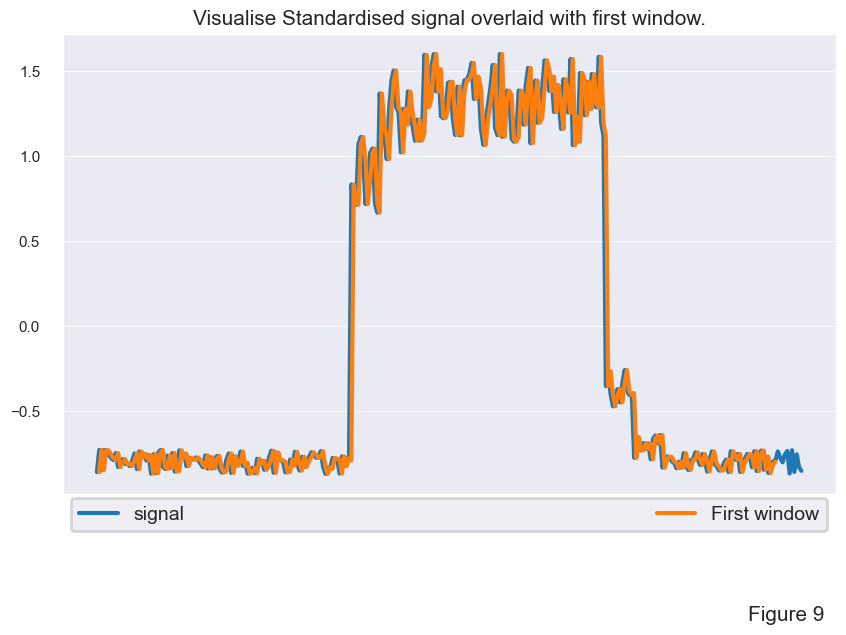

In [29]:
# Create figure and single axes.
fig, ax = plt.subplots(figsize=(10, 6))

# store training vals in signal varaible.
signal = df_train_vals['value'].values[0:300]

# plot no anomoly signal values.
ax.plot(np.arange(signal.shape[0]), signal, label='signal')

# Declare the first window.
first_window = x_train[0].flatten()[0:300]

# Plot the first window.
ax.plot(np.arange(first_window.shape[0]) + 1, first_window, label='First window')

# format and label plot.
ax.set_title("Visualise Standardised signal overlaid with first window.", fontsize=15)
ax.axes.get_xaxis().set_ticks([]) 
plt.figtext(0.85, -0.1, 'Figure 9', horizontalalignment='center', fontsize=15)
ax.legend(bbox_to_anchor=(0, -0.1 ,1 ,0.2),mode="expand", ncol=4, fontsize=14);

# 5. Building The Neural Network

***

<h2><span style='color:#00008B'>5.1 Declare Model</span></h2>

Lets build the  convolutional reconstruction autoencoder model as per the [documentation](https://keras.io/examples/timeseries/timeseries_anomaly_detection/). For clairty each layer declaration will be numbered as a reference point to be discussed post model declaration.

In [30]:
# get number of neurons and dimensions from x_train.
sequence_length = x_train.shape[1]
num_features = x_train.shape[2]

In [31]:
# building the model
layers = [
   # 1. instantiate Keras Tensor (takes window as input)
  keras.layers.Input(shape=(sequence_length, num_features)),
    
  # 2. Declare first 1D convolution layer.
  keras.layers.Conv1D(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
    
  # 3. Declare Dropout layer.
  keras.layers.Dropout(rate=0.2),
    
  # 4. Declare second 1D convolution layer.
  keras.layers.Conv1D(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
    
  # 5. Declare First Transposed convolution layer.
  keras.layers.Conv1DTranspose(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
    
  # 6. Declare Dropout layer.
  keras.layers.Dropout(rate=0.2),
    
  # 7. Declare Second Transposed convolution layer.
  keras.layers.Conv1DTranspose(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
    
   # 8. Declare Output layer.
  keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]

In [32]:
# https://keras.io/guides/sequential_model/
# declared model with plain stack of layers 
# Each layer has 1x input tensor and 1x output tensor
model = keras.Sequential(layers)

# https://keras.io/api/optimizers/
# declare optimiser for model with learning rate.
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# compile model with passed Adam optimiser and mean sq. error loss function.
model.compile(optimizer=optimizer, loss="mse")

In [33]:
# print summary of neural network.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

**Model declaration steps in more detail (see documentation references as hyperlinks):**

#### 1. [Input Object:](https://keras.io/api/layers/core_layers/input/)
As per the documentation the Input layer is a symbolic tensor-like object which in this case is instansiated with a sequence length of 288 (i.e: the number of windows) and for training on 1 feature. A tensor is esentially a container with n-dimensions that gives us the means to mathamatically describe the relationship of these containers relative to eachother in a given vector space. For Neural networks tensors allow us to represent the transformation of the input data to hopefully yield the desired output. <br><br>


#### 2. [First Conv1D:](https://keras.io/api/layers/convolution_layers/convolution1d/)
As per the documentation “*This layer creates a convolution kernel that is convolved with the layer input over a single spatial (or temporal) dimension to produce a tensor of outputs.*”  This Lets try and break this down into into smaller parts in an attempt to understand it.<br>

- **[1D-Convolution:](https://keras.io/api/layers/regularization_layers/dropout/)** <br>
The process of convolution in neural networks refers to placing filters (i.e: weights) of pre-defines size (kernel size) over your input data. The windows are the slid across the input vector, performing element-wise multiplication of the input element with the corresponding weights to produce an output. This dot product operation between the kernel size patch of the input and the filter is then summed to produce a single scalar product [16 Brown 2020]. Successive dot product operations via the same filter on different sections of the input result in more scalar products that form a feature map. Brownlee (2022) helps explain how this feature map is then passed to an activation function (ReLU in our case) for processing. Note we will discuss this activation function in more detail below.<br><br>

- **[Padding:](https://keras.io/api/layers/regularization_layers/dropout/)** <br>
In our model we are using a weights array of size 7 (kernel size). Using a kernel size or more than 1 results in an output vector of smaller than the input size, however we can control this by setting the model’s padding attribute to “same”. This adds zeros to each end of the output vector to match its size to that of the input. This is an important step as we want to regenerate our output as part of the autoencoder model. <br><br>

- **[Stride:](https://keras.io/api/layers/regularization_layers/dropout/)** <br>
In our model we have declared a stride of 2, meaning that our filter will move 2 elements at a time during the convolution process. Setting the stride to 2 will down-sample the input vector by half, resulting in an output vector of half the size.  <br><br>



#### 3. [First Dropout:](https://keras.io/api/layers/regularization_layers/dropout/)
As Per the documentation the dropout layer randomly sets a percentage of the inputs to zero and scales the others, this is done to help prevent overfitting. In our case we have set a rate of 0.2 meaning 20% of the layer will randomly be set to zero, while the other 80 % will be scaled up. The idea here is that we don’t want our model to learn the statistical noise in our training dataset as this may hinder its ability to predict new data. The dropout layer essentially helps reset previous layer activations in the model, helping one model learn many network architectures.

#### 4. [Second Conv1D:](https://keras.io/api/layers/convolution_layers/convolution1d/)
More convolution with half the filter size.


#### 5. [First Conv1DTranspose Layer:](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1DTranspose)
Before the data reaches this layer in the model it would have passed through the encoder and been compressed to a "bottleneck". This layer starts the decoding process via transposing the feature map. Mishra (2020) describes this well by detailing how transposed convolutions are used to unsample the input feature map and using some learnable parameters. In other words we are re-shaping the data while retaining some of the useful information from the lower-dimensional data.

#### 6. Second Dropout:
#### 7. Second Conv1DTranspose Layer:
#### 8. Output Layer:




<br>

<h2><span style='color:#00008B'>5.2 Train Model</span></h2>

Now we will train the model. Notice in the cell below that we pass the same input and output data to the model.fit() function. This makes sense because we are training our neural network to make the neural connections relative to itself to learn the how the data is connected. Training a model on itself will be useful later on when we want to recognise anomalous data. Think back to the Autoencoder section above where we explored how the reconstruction error of the model can be leveraged when try to detect anomalous data, this will be used as our treshhold to help detect outliar data (more on this later).

In [34]:
# https://keras.io/api/models/model_training_apis/
# train the model with the parameters shown:
num_epochs = 50

history = model.fit(
    x_train,               # input data.
    x_train,               # output data (same as input data).
    epochs=num_epochs,     # training iterations on dataset.
    batch_size=128,        # number of samples per gradient update.
    validation_split=0.1,  # 10% of data used as validation data.
    callbacks=[
        # https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
        # Apply EarlyStopping callback during training, 
        # Stop training when the min validation loss hasn't improved after 5 epochs.
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 2s 65ms/step - loss: 0.5204 - val_loss: 0.0992
Epoch 2/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0841 - val_loss: 0.0449
Epoch 3/50
27/27 [==============================] - 2s 57ms/step - loss: 0.0592 - val_loss: 0.0393
Epoch 4/50
27/27 [==============================] - 2s 57ms/step - loss: 0.0514 - val_loss: 0.0331
Epoch 5/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0443 - val_loss: 0.0291
Epoch 6/50
27/27 [==============================] - 1s 54ms/step - loss: 0.0393 - val_loss: 0.0267
Epoch 7/50
27/27 [==============================] - 2s 57ms/step - loss: 0.0357 - val_loss: 0.0239
Epoch 8/50
27/27 [==============================] - 1s 55ms/step - loss: 0.0327 - val_loss: 0.0224
Epoch 9/50
27/27 [==============================] - 2s 56ms/step - loss: 0.0302 - val_loss: 0.0221
Epoch 10/50
27/27 [==============================] - 1s 54ms/step - loss: 0.0283 - val_loss: 0.0206
Epoch 11/


<br>

# 6. Evaluation

***
<h2><span style='color:#00008B'>6.1 Training</span></h2>

Before we evaluate the models Training Loss and Validation Loss lets define what they are.
- **Training Loss:** This is a measure of how the models performs on the training set using our cost function as a guage. Earlier the model was fit with a validation set of 10%, leaving 90% of the dataset for training. One expects the mean squared error to drop during the training of the model as we previously discussed.
- **Validation Loss:** Acts as a measure of how well our trained model fits the validation set. It is important that the validation set was not used to train our model as we want to see how good our model is at predicting new data. <br>

Looking at the results in Figure 10 below we can see that our model probably does not require any more training as the Training and Validation loss metrics are both low and almost parallel with the x-axis on left subplot. After each epoch our model learns the data and the difference between the loss metrics shrink until the model can not learn anymore. This tells us that our model works well at predicting the unseen data. One should be careful when evaluating the loss metrics as models can be prone to overfitting and underfitting, see below for examples:
- **Overfitting:**<br>
When the training loss is considerably lower than the validation loss. This indicates that the model has trained on some of the noise of the data and loses the ability to predict the validation set. <br><br>

- **Underfitting:**<br>
When both the training and validation loss have not achieved a low cost metric.

In [35]:
# Check what the History callback was tracking.
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [36]:
# declare traning and validation loss arrays.
loss_t = history.history["loss"]
loss_v = history.history["val_loss"]

# x range for full number of epochs.
x = list(range(1, len(loss_t) + 1))

# get index for element at centre position.
idk = len(x)//2

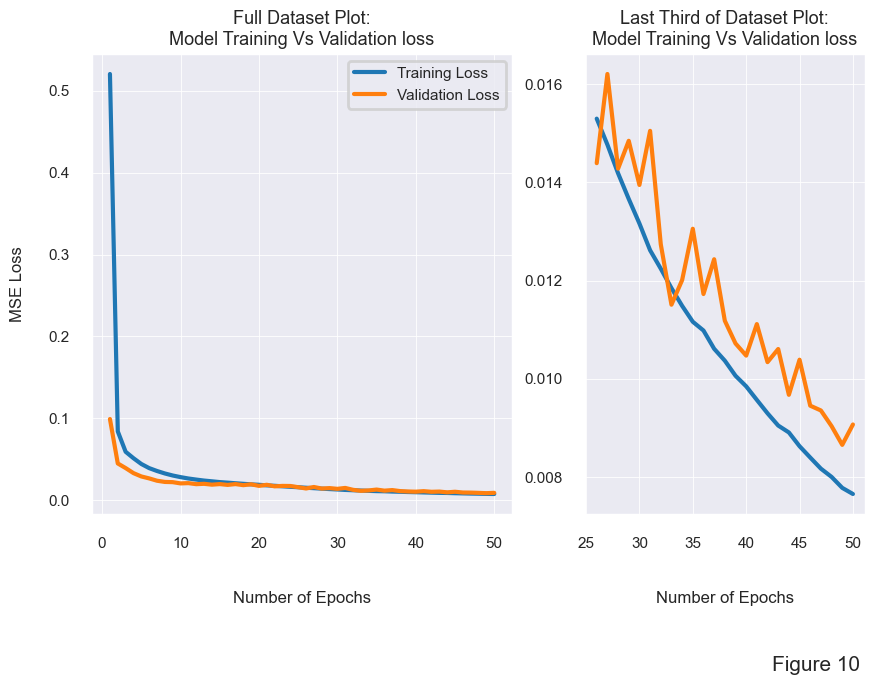

In [37]:
# create figure and 2 axis.
fig, (ax1, ax2) = plt.subplots(1, 2 ,figsize=(10 ,6), gridspec_kw={'width_ratios': [1.5, 1]})

# Plot Full dataset for Training and Validation Loss.
ax1.plot(x, loss_t, label="Training Loss")
ax1.plot(x, loss_v, label="Validation Loss")

# Plot Second half of Training and Validation Loss.
ax2.plot(x[idk:], loss_t[idk:], label="Training Loss")
ax2.plot(x[idk:], loss_v[idk:], label="Validation Loss")

# Label and format Plots.
ax1.legend()
ax1.set_ylabel('MSE Loss\n')
ax1.set_xlabel('\n\nNumber of Epochs')
ax2.set_xlabel('\n\nNumber of Epochs')
ax1.set_title('Full Dataset Plot:\nModel Training Vs Validation loss', fontsize=13)
ax2.set_title('Last Third of Dataset Plot:\nModel Training Vs Validation loss', fontsize=13)
plt.figtext(0.85, -0.15, 'Figure 10', horizontalalignment='center', fontsize=15);

<h2><span style='color:#00008B'>6.2 Detecting Anomalies</span></h2>

Our target here is to get the Mean Absolute Error (MAE) between our training samples and predicted samples. The maximum MAE obtained will tell us the worst performance metric during self-prediction. This metric can be used in future models as a threshold, where samples with MAE values > threshold can be labelled as anomalous.

In [38]:
# Reminder of training dataset shape
x_train.shape

(3745, 288, 1)

In [39]:
# Use model to try and predict itself using x_train. 
x_train_pred = model.predict(x_train)

118/118 [==============================] - 1s 6ms/step


In [40]:
# Calculate mean absolute error between training set and prediction set.
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

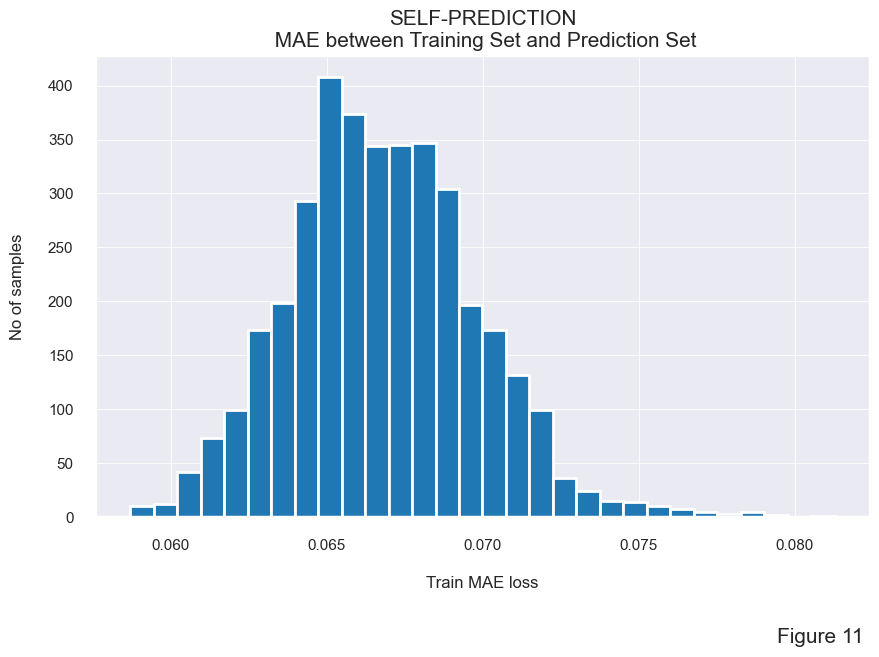

In [41]:
# Create figure and single axes.
fig, ax = plt.subplots(figsize = (10, 6))

# plot histogram of mean absolute error from self-prediction.
ax.hist(train_mae_loss, bins=30)

# label and format plot
ax.set_xlabel('\nTrain MAE loss')
ax.set_ylabel('No of samples\n')
ax.set_title('SELF-PREDICTION\n MAE between Training Set and Prediction Set', fontsize=15)
plt.figtext(0.85, -0.1, 'Figure 11', horizontalalignment='center', fontsize=15);

In [42]:
# Get reconstruction error threshold.
threshold = np.max(train_mae_loss)

# have a look at treshhold.
f'Treshhold is: {threshold:.5f}'

'Treshhold is: 0.08128'

<h2><span style='color:#00008B'>6.3 Compare Prediction Reconstruction</span></h2>

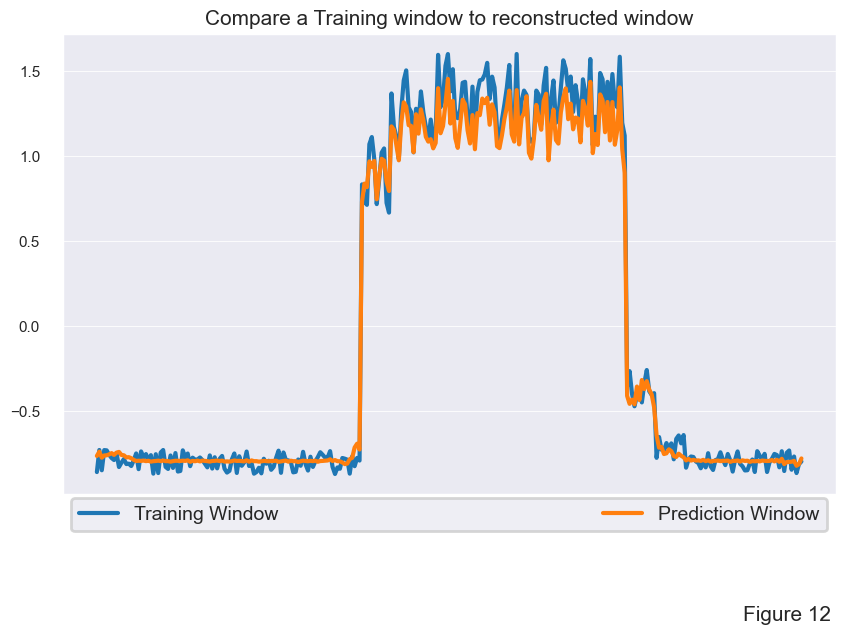

In [43]:
window_number = 0

# Create figure and single axes.
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the training set first window.
ax.plot(x_train[window_number], label ='Training Window')

# Plot the prediction first window.
ax.plot(x_train_pred[window_number], label='Prediction Window');

# format and label plot.
ax.set_title("Compare a Training window to reconstructed window",  fontsize = 15)
ax.axes.get_xaxis().set_ticks([]) 
plt.figtext(0.85, -0.1, 'Figure 12', horizontalalignment='center', fontsize=15)
ax.legend(bbox_to_anchor=(0, -0.1 ,1 ,0.2),mode="expand", ncol=4, fontsize=14);

<h2><span style='color:#00008B'>6.4 Prepare Test Data</span></h2>

In [44]:
# Standardization of noisy data to transform it to standard format (as before)
df_test_value = (df_daily_jumpsup - train_mean) / train_std

# look at last 5 rows
df_test_value.tail()

,value
timestamp,
2014-04-14 23:35:00,-0.867742
2014-04-14 23:40:00,-0.763481
2014-04-14 23:45:00,-0.778984
2014-04-14 23:50:00,-0.861348
2014-04-14 23:55:00,-0.732810


In [45]:
# confirm mean is nearly 0 and std dev nearly 1
df_train_vals['value'].mean(),\
df_train_vals['value'].std()

(-2.616541242931684e-15, 1.0000000000000018)

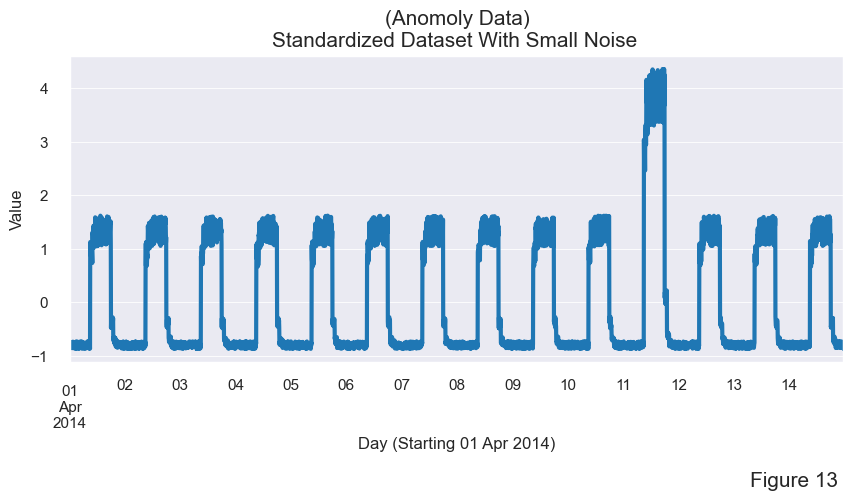

In [46]:
# create figure and single axes.
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot standardized anomoly data.
df_test_value.plot(legend=False, ax=ax)

# format and label plot.
ax.set_xlabel('Day (Starting 01 Apr 2014)')
ax.set_ylabel('Value')
ax.set_title("(Anomoly Data)\nStandardized Dataset With Small Noise ", fontsize=15)
plt.figtext(0.85, -0.2, 'Figure 13', horizontalalignment='center', fontsize=15);

In [47]:
# get nd array of test values (with 288 windows).
x_test = windows(df_test_value.values, window_size=288)
print("Test input shape: ", x_test.shape)

Test input shape:  (3745, 288, 1)


In [48]:
# Use model to predict test values. 
x_test_pred = model.predict(x_test)

118/118 [==============================] - 1s 6ms/step


In [49]:
# Calculate mean absolute error between test set and prediction set.
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)

# Collapse all the arrays into 1 demension
test_mae_loss = test_mae_loss.flatten()
test_mae_loss

array([0.06504811, 0.06595643, 0.07001428, ..., 0.06959106, 0.06880203,
       0.07202376])

<h2><span style='color:#00008B'>6.5 Evaluate Test Data</span></h2>

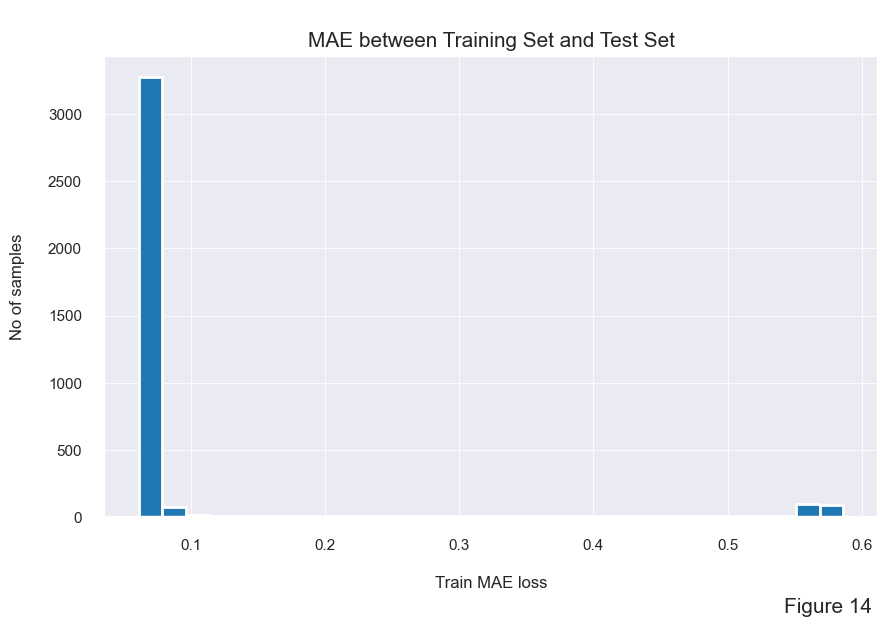

In [50]:
# Create figure and single axes.
fig, ax = plt.subplots(figsize=(10, 6))

# plt histogram of MAE between test and training set
ax.hist(test_mae_loss, bins=30)

# label and format plot
ax.set_xlabel('\nTrain MAE loss')
ax.set_ylabel('No of samples\n')
ax.set_title('\nMAE between Training Set and Test Set',  fontsize=15)
plt.figtext(0.85, -0.05, 'Figure 14', horizontalalignment='center', fontsize=15);

Lets use the threshold previously calculated on predicting the validation set as our ruler when looking at Figure 14. The plot above shows a jump just before the MAE Treshhold. This can most likely be attributed to the "Baseline" MAE the model experienced when predicting the Prediction set (as per Figure 11). We will overlay the Prediction Set and Test Set MAE values in Figure 15 below. In theory there should be similar overlap and MAE total between the datasets.

Figure 14 also shows data on the right hand side of the plt that is above the MAE treshhold. This is assumed to represent the anomolous data, as the models training data and the test data would have a relatively large difference.

In [51]:
def get_mae_sum(mae_array, limit):
    '''returns mean absolute error sum of list below declared limit'''
    mae_sum = 0
    for mae in mae_array:
        if mae < limit:
            mae_sum += mae      
            
    return mae_sum

In [52]:
# get sum of test MAE values where MAE < threshold.
test_mae_sum = get_mae_sum(test_mae_loss, threshold)

# get sum of train MAE values where MAE < threshold.
train_mae_sum = get_mae_sum(train_mae_loss.flatten(), threshold)

# slice test MAE loss array where data < threshold.
test_mae_loss_sliced = test_mae_loss[test_mae_loss < threshold]

# slice train MAE loss array where data < threshold.
train_mae_loss_sliced = train_mae_loss.flatten()[train_mae_loss.flatten() < threshold]

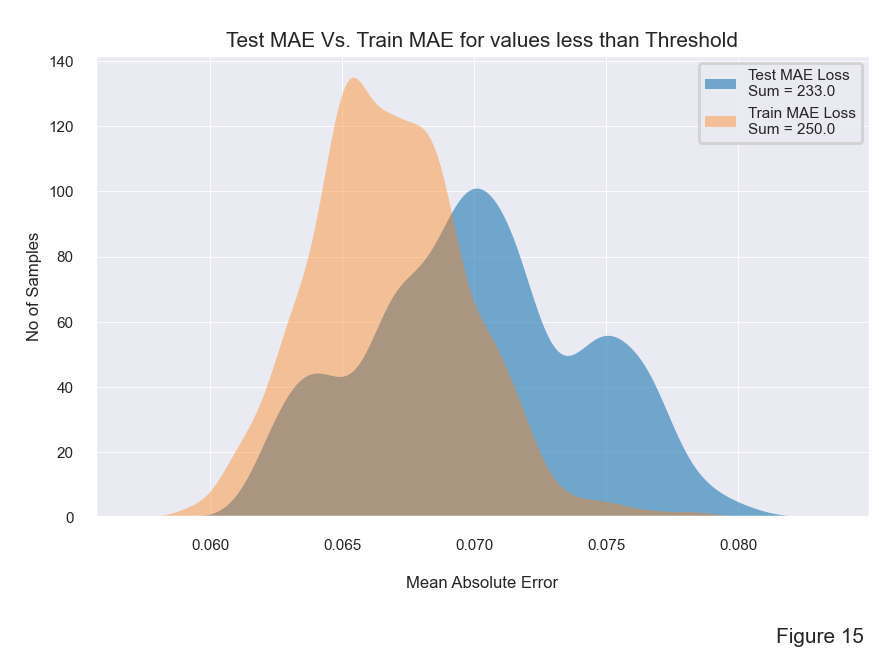

In [53]:
# create figure and single axes.
fig, ax = plt.subplots(figsize=(10, 6))

# plot kde for test MAE and train MAE data where data < threshold.
sns.kdeplot(test_mae_loss_sliced, ax=ax,  multiple="stack", alpha=.6, linewidth=0, label = 'Test MAE Loss\n\
Sum = {}'.format(np.round(test_mae_sum),1))

sns.kdeplot(train_mae_loss_sliced, ax=ax,  multiple="stack", alpha=.4, linewidth=0,label = 'Train MAE Loss\n\
Sum = {}'.format(np.round(train_mae_sum),1))
            
# label plot.
ax.set_xlabel('\nMean Absolute Error')
ax.set_ylabel('\nNo of Samples')
ax.set_title("\nTest MAE Vs. Train MAE for values less than Threshold",  fontsize=15)
plt.figtext(0.85, -0.1, 'Figure 15', horizontalalignment='center', fontsize=15)
plt.legend();

As we can see above the MAE values overlap to some degree and have a similar total value. This is to be expected as both models should have similar MAE values in the regions of data that are deemed non-anomolous.

<h2><span style='color:#00008B'>6.6 Plot Anomalies</span></h2>

In [54]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold

# Number True values as anomalies.
print('There are {} anomalies.'.format(np.sum(anomalies)))

There are 417 anomalies.


In [55]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies.
inds = []

# iterate all except first and last timestep.
for i in range(window_size - 1, len(df_test_value) - window_size + 1):
    
    # if all values in previous windows are anomolous.
    if np.all(anomalies[i - window_size + 1 : i]):
        
        # append index to list.
        inds.append(i)

In [56]:
# declare offset for alligning indices for plotting.
offset = 100

# declare low index as index of first occurance of anomoly - offset.
low_idx = inds[0] - offset

# declare high index as index of first occurance of anomoly + window size - offset.
high_idx = inds[0] + window_size - offset

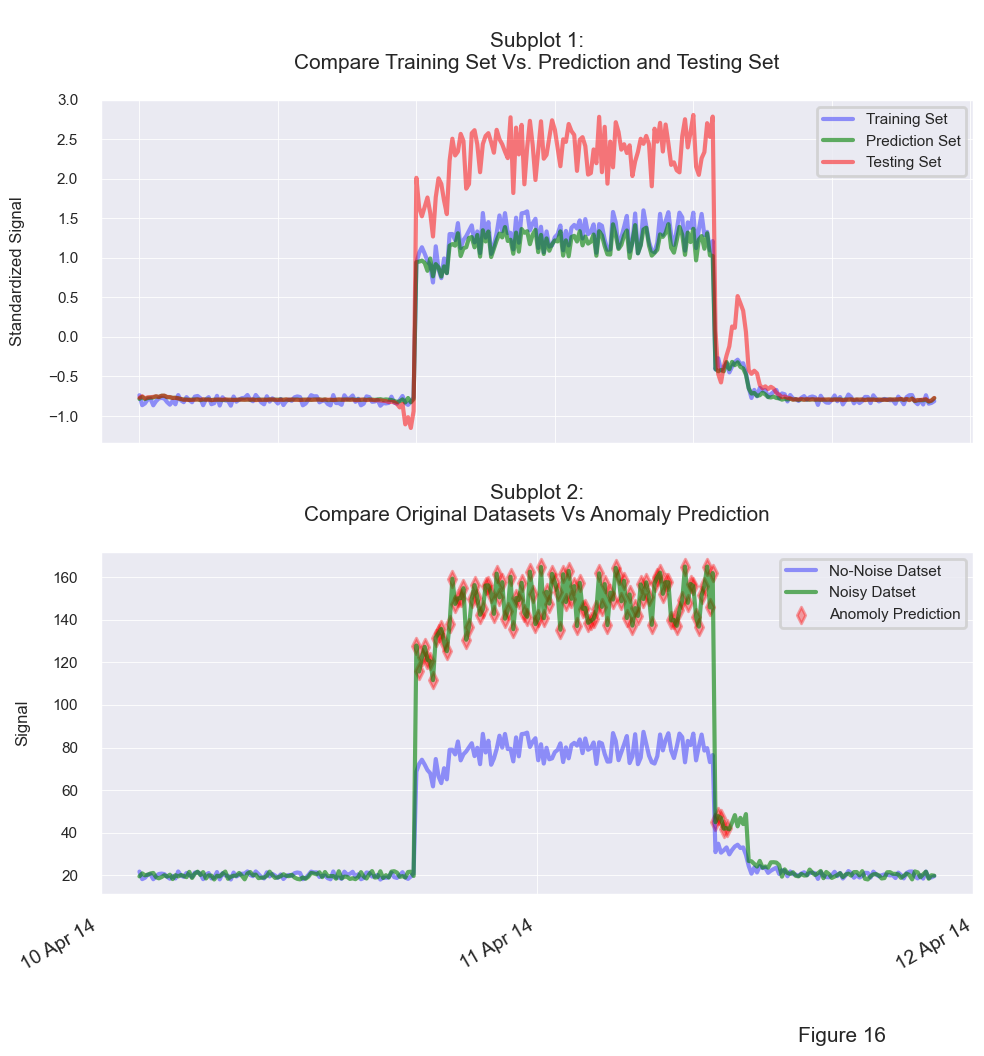

In [57]:
# create figure and 2 axis.
fig, (ax1, ax2) = plt.subplots(2, 1 ,figsize=(10, 10))
plt.figtext(0.85, -0.05, 'Figure 16', horizontalalignment='center', fontsize=15)


# ********************************plotting a window with anomaly***********************************
# Plot the training set.
ax1.plot(x_train[low_idx], label='Training Set', color='blue', alpha=0.4)

# Plot the prediction set.
ax1.plot(x_train_pred[low_idx], label='Prediction Set', color='green', alpha=0.6);

# Plot the anomly predictions.
ax1.plot(x_test_pred[low_idx], label='Testing Set', color='red', alpha=0.5);


# ******************************************plotting datasets*********************************************
# plot no-noise dataset.
ax2.plot(df_small_noise.index[low_idx : high_idx], df_small_noise['value'][low_idx : high_idx],\
         label='No-Noise Datset', color='blue', alpha=0.4)

# plot noisy dataset.
ax2.plot(df_daily_jumpsup.index[low_idx : high_idx], df_daily_jumpsup['value'][low_idx : high_idx],\
         label='Noisy Datset', color='green', alpha=0.6)

# index noisy dataframe where ANN thinks there is anomolous data.
anomoly_data = df_daily_jumpsup.iloc[inds]

# plot anomoly predictions.
ax2.scatter(anomoly_data.index, anomoly_data['value'], marker=(2, 1), label='Anomoly Prediction',\
            color='red', alpha=0.35)

# format date x-axis*************************************************************************************
start, end = ax2.get_xlim()                                       # store lower and higher x-axis limits.
xticks = np.linspace(start, end, 3)                               # get 3 intervals spaced across x-range.
ax2.set_xticks(xticks)                                            # pass intervals as xticks.
ax2.set_xticklabels(xticks)                                       # pass intervals as xlabels.
ax2.xaxis.set_major_formatter(dt.DateFormatter('%d %b %y'))       # set date format
fig.autofmt_xdate()                                               # auto date styling.
ax2.minorticks_off()                                              # remove minor ticks.
plt.xticks(fontsize=14)                                           # increase size of x-ticks.

# label and format plots*********************************************************************************
ax1.set_title('\nSubplot 1:\nCompare Training Set Vs. Prediction and Testing Set\n', fontsize=15) 
ax2.set_title('\nSubplot 2:\nCompare Original Datasets Vs Anomaly Prediction\n', fontsize=15) 
ax1.set_ylabel('Standardized Signal\n') 
ax2.set_ylabel('Signal\n') 
ax1.legend()
ax2.legend()

# adjust subplots for best fit.
fig.tight_layout();

If we take a look at Subplot 1 in figure 16 above we can see the standarized signals in a region (window) where the Testing Set experiences an anomoly. As expected the Testing Set (no-noise dataset used to train this model) and the Prediction Set (self-prediction) show significant overlap. As discussed the model uses the max mean absolute error between the Training set and the Prediction set as threshold to guage outliar data. The regions where the reconstruction error in the Testing set is larger than this threshold inevitably dictates the anomoly predictions which are shown in Subplot 2.

<h1>7. Conclusion:</h1>

<h1>8. References:</h1>

<br> 

[1]. Bhattacharya, A, 2020, Effective Approaches for Time Series Anomaly Detection, Towards Data Science, available at:<br>
[Ref Link](https://towardsdatascience.com/effective-approaches-for-time-series-anomaly-detection-9485b40077f1) (Viewed 21 December 2022).

<br>

[2]. Bandyopadhyay, H, 2022, Autoencoders in Deep Learning: Tutorial & Use Cases, V7labs, available at:<br>
[Ref Link](https://www.v7labs.com/blog/autoencoders-guide) (Viewed 21 December 2022).

<br>

[3].Koech, K, 2022, The Basics of Neural Networks (Neural Network Series) — Part 1, Towards Data Science, available at:<br>
[Ref Link](https://towardsdatascience.com/the-basics-of-neural-networks-neural-network-series-part-1-4419e343b2b) (Viewed 22 December 2022).

<br>


[4] Saxena, A, 2020, Building a Simple Neural Network from Scratch, Towards Data Science, available at:<br>[Ref Link](https://miro.medium.com/max/640/1*UWJ52M5qNZp-38j11STT5g.webp) (Viewed 22 December 2022).

<br>

[5]. Ganesh, S, 2020, What’s The Role Of Weights And Bias In a Neural Network?, Data Science, available at:<br>
[Ref Link](https://towardsdatascience.com/whats-the-role-of-weights-and-bias-in-a-neural-network-4cf7e9888a0f) (Viewed 23 December 2023).

<br>

[6].JORDAN, J, 2018, Introduction to autoencoders. Data Science, available at:<br>
[Ref Link](https://www.jeremyjordan.me/autoencoders/) (Viewed 23 December 2022).


<br>   

[7]. S, Kostadinov, 2019, Understanding Backpropagation Algorithm, Towards Data Science, available at:<br>
[Ref Link](https://towardsdatascience.com/understanding-backpropagation-algorithm-7bb3aa2f95fd) (Viewed 23 December 2022).

<br>

[8]. Um, A, 2020, Preprocessing time series to windowed datasets, medium.com, available at:<br>
[Ref Link](https://albertum.medium.com/preprocessing-time-series-to-windowed-datasets-a464799b1df7) (Viewed 28 December 2022).

<br>

[9]. MathWorks, 2022, available at:<br>
[Ref Link](https://www.mathworks.com/help/deeplearning/ref/nnet.cnn.layer.convolution1dlayer.html) (Viewed 30 December 2022).

<br>

[10]. Mostafavi, K, 2022, What is the difference between the kernel size and the number of filter in CNN?, Quora, available at:<br>
[Ref Link](https://www.quora.com/What-is-the-difference-between-the-kernel-size-and-the-number-of-filter-in-CNN) (Viewed 30 December 2022).

<br>

[11]. SHARMA, S, 2017, Activation Functions in Neural Networks, Towards Data Science, available at:<br>
[Ref Link](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6) (Viewed 30 December 2022).

<br>


[12].  Brownlee, J, 2020, A Gentle Introduction to the Rectified Linear Unit (ReLU), Machine Learning Mastery, available at:<br>
[Ref Link](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) (Viewed 30 December 2022).

<br>

[13]. Musstafa, 2021, Optimizers in Deep Learning, Medium.com,  available at:<br>
[Ref Link](https://medium.com/mlearning-ai/optimizers-in-deep-learning-7bf81fed78a0) (Viewed 01 January 2023).

<br>

[14]. Brownlee, J, 2021, Code Adam Optimization Algorithm From Scratch, available at:<br>
[Ref Link](https://machinelearningmastery.com/adam-optimization-from-scratch/) (Viewed 02 January 2023).

<br>

[15]. Jacob, T, 2022, Vanishing Gradient Problem, Explained, KD Nuggets, available at:<br>
[Ref Link](https://www.kdnuggets.com/2022/02/vanishing-gradient-problem.html) (Viewed 02 January 2023).

<br>


[16]. Brownlee, J, 2020, How Do Convolutional Layers Work in Deep Learning Neural Networks? Machine Learning Mastery, available at:<br>
[Ref Link](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/) (Viewed 03 January 2023).

<br>

[17]. Mishra, D, 2020, Transposed Convolution Demystified, Towards Data Science, available at:<br>
[Ref Link](https://towardsdatascience.com/transposed-convolution-demystified-84ca81b4baba) (Viewed 04 January 2023).

<br>

[18]. x, y, 202-, ..., ..., available at:<br>
[Ref Link](link here) (Viewed X December 2022).

<br>


***

## End